# Predictive Analytics on Credit Card Defaults

### Authors
**Group 3**

Cameron Wonchoba, Matthew Tate

### Date
2/17/2020

# Overview

### Buisness Problem
Before we go into the buisness problem, it is important to understand what *default payments* are. According to [creditcards.com](https://www.creditcards.com/credit-card-news/glossary/term-default.php), **default payments are when people fail to make a payment on debt before the due date.**  

The impacts of a default payment often are more severe for the defaultee than they are for the credit lender.  The credit lender will be required to take action against the defaultee but should be able to recoupe their loss through levies, garnishments, fees, etc.

In order to better serve the intests of the customer and the lender, predictive analytics is required to determine whether or not a given customer will default on their next monthly payment.  This will allow the lender to better understand their customers and their risk factors.

##### Actionable Decision:
Each customer will be split into two categories:
1. Will Default
2. Will not Default

Credit Card companies can perform a "Risk Assessment" of their customers to identify customers who are at a higher risk of not paying back their loans.

Splitting up customers into these two classes will allow Credit Card companies to identify "high risk" individuals and intervene in a strategic way.

### Model Objective
Based on the data, identify if a customer will default a payment or not.

This is a **Binary Classification** problem (predicting whether an individual will default a payment or not).

The following models are good for Binary Classification problems:
* Two-Class Averaged Perceptron
* Two-Class Decision Forest
* Two-Class Logistic Regression
* Two-Class Boosted Decision Tree
* Two-Class Neural Network

### Dataset Description

##### Where?
This dataset was retrieved from [here](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/data).

##### Description

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


# Exploratory Data Analysis

<h3 align="left">1) Dataset field Definition</h3>

<h4 align="left">There are 25 variables:</h4><br>
1) ID: ID of each client <br>
2) LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit <br>
3) SEX: Gender (1=male, 2=female) <br>
4) EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
5) MARRIAGE: Marital status (1=married, 2=single, 3=others) <br>
6) AGE: Age in years <br>
7)  PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) <br>
8) PAY_2: Repayment status in August, 2005 (scale same as above) <br>
9) PAY_3: Repayment status in July, 2005 (scale same as above) <br>
10) PAY_4: Repayment status in June, 2005 (scale same as above) <br>
11) PAY_5: Repayment status in May, 2005 (scale same as above) <br>
12) PAY_6: Repayment status in April, 2005 (scale same as above) <br>
13) BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
14) BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br>
15) BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
16) BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br>
17) BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br>
18) BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
19) PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
20) PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br>
21) PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br>
22) PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br>
23) PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
24) PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br>
25) default.payment.next.month: Default payment (1=yes, 0=no) <br>

## Pandas Profiling

In [1]:
#Including Libraries
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np

#Note you may need to install pandas_profiling - Run anaconda prompt as admin and run:
#'conda install -c conda-forge pandas-profiling'

In [2]:
# google colab things
## from google.colab import files
## files.upload()

#Importing Data 
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Generating Profile Report
profile = ProfileReport(df)

#Outputing Profile Report to html file in current directory
profile

### Investigate the Target Variable

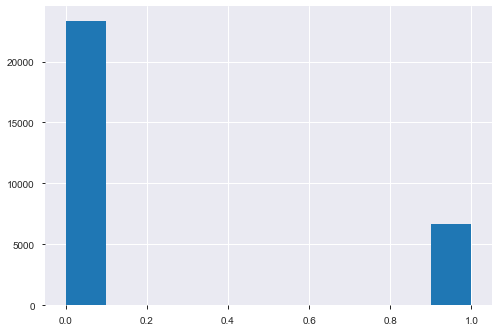

In [5]:
df['default.payment.next.month'].hist()

### Imbalanced Target Variable
Our target variable is imbalanced.

This affects our:
* Evaluation Metrics
* Sampling Techniques

# Feature Engineering

###  PP (Percentage Paid)
Percentage of total amount due over 6 months paid.

#### Why?
This will capture the customers typical payment behavior providing a sense of "reliablility of payee".

In [6]:
PP = (df['PAY_AMT1'] + df['PAY_AMT2'] + \
                    df['PAY_AMT3'] + df['PAY_AMT4'] + \
                    df['PAY_AMT5'] + df['PAY_AMT6']) / \
            (df['BILL_AMT1'] + df['BILL_AMT2'] + \
                    df['BILL_AMT4'] + df['BILL_AMT3'] + \
                    df['BILL_AMT5'] + df['BILL_AMT6'])

df_PP = pd.DataFrame(data=PP, columns=["PP"])

# Correct outliers.
df_PP.loc[(df_PP.PP > 1), 'PP']=1
df_PP.loc[(df_PP.PP < 0), 'PP']=0

# Correct divide by zero error. Indicates that they are paying, but not being billed.
df_PP = df_PP.fillna(1)
df_PP.head()

,PP
0,0.089434
1,0.292791
2,0.108388
3,0.036259
4,0.540054


### AVG_BILL_CL
Ratio of a customers average Bill amount per month and normalized by their Credit Limit.

##### Why?
This will capture how much of their credit limit each customer spends per month. This will allow us to see if the customer is spending most of the spending limit or not.

In [7]:
# Ratio of a customers average Bill amount per month and their Credit Limit.
AVG_BILL_CL = ((df['BILL_AMT1'] + \
                df['BILL_AMT2'] + \
                df['BILL_AMT3'] + \
                df['BILL_AMT4'] + \
                df['BILL_AMT5'] + \
                df['BILL_AMT6']) / 6) / \
                df['LIMIT_BAL']

# Create dataframe.
df_AVG_BILL_CL = pd.DataFrame(data=AVG_BILL_CL, columns=["AVG_BILL_CL"])
df_AVG_BILL_CL.head()

,AVG_BILL_CL
0,0.064200
1,0.023718
2,0.188246
3,0.771113
4,0.364463


### AVG_PAY_CL
Ratio of a customers average Payment amount per month normalized by their Credit Limit.

##### Why?
This will capture how much of their credit limit each customer pays per month. This will allow us to see if the customer is able to pay their credit limit or not.

In [8]:
# Ratio of a customers average Payment amount per month and their Credit Limit.

AVG_PAY_CL = ((df['PAY_AMT1'] + \
               df['PAY_AMT2'] + \
               df['PAY_AMT3'] + \
               df['PAY_AMT4'] + \
               df['PAY_AMT5'] + \
               df['PAY_AMT6']) / 6) / \
               df['LIMIT_BAL']

# Create dataframe.
df_AVG_PAY_CL = pd.DataFrame(data=AVG_PAY_CL, columns=["AVG_PAY_CL"])
df_AVG_PAY_CL.head()

,AVG_PAY_CL
0,0.005742
1,0.006944
2,0.020404
3,0.027960
4,0.196830


### NUM_DELAYS
Number of times a customer delay their bill payment. 

##### Why?
This will quantify a customers willingness to pay on time. This feature tells us how many times a customer didn't exhibit perfect behaivor in the past.

In [9]:
NUM_DELAYS = df.apply(lambda row: \
                        (1 if row.PAY_0 > 0 else 0) + \
                        (1 if row.PAY_2 > 0 else 0) + \
                        (1 if row.PAY_3 > 0 else 0) + \
                        (1 if row.PAY_4 > 0 else 0) + \
                        (1 if row.PAY_5 > 0 else 0) + \
                        (1 if row.PAY_6 > 0 else 0) \
                    , axis=1)

# Create dataframe.
df_NUM_DELAYS = pd.DataFrame(data=NUM_DELAYS, columns=["NUM_DELAYS"])
df_NUM_DELAYS.head()

,NUM_DELAYS
0,2
1,2
2,0
3,0
4,0


## Exploring NUM_DELAYS and its predictive power.

Text(0, 0.5, 'FREQUENCY')

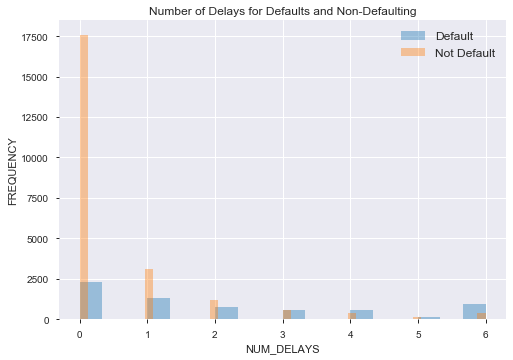

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_NUM_DELAYS_TARGET = pd.concat([df['default.payment.next.month'],df_NUM_DELAYS], axis=1)

df_default_one = df_NUM_DELAYS_TARGET[df_NUM_DELAYS_TARGET['default.payment.next.month']== 1]
sns.distplot(df_default_one['NUM_DELAYS'], kde=False, label="Default")

df_default_zero = df_NUM_DELAYS_TARGET[df_NUM_DELAYS_TARGET['default.payment.next.month']== 0]
sns.distplot(df_default_zero['NUM_DELAYS'], kde=False, label="Not Default")

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Number of Delays for Defaults and Non-Defaulting')
plt.xlabel('NUM_DELAYS')
plt.ylabel('FREQUENCY')

According to this graph, if a customer has never defaulted, they are very likely to not default again.

Text(0, 0.5, 'FREQUENCY')

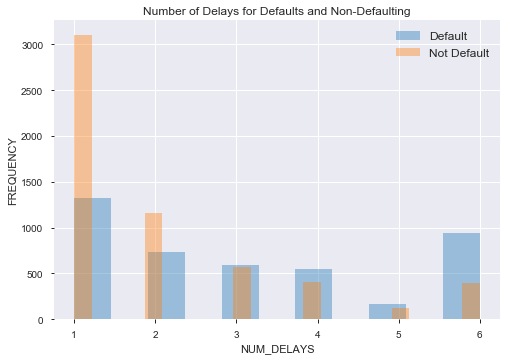

In [11]:
df_NUM_DELAYS_not_zero = df_NUM_DELAYS_TARGET[df_NUM_DELAYS_TARGET['NUM_DELAYS'] > 0]

df_default_one = df_NUM_DELAYS_not_zero[df_NUM_DELAYS_not_zero['default.payment.next.month']== 1]
sns.distplot(df_default_one['NUM_DELAYS'], kde=False, label="Default")

df_default_zero = df_NUM_DELAYS_not_zero[df_NUM_DELAYS_not_zero['default.payment.next.month']== 0]
sns.distplot(df_default_zero['NUM_DELAYS'], kde=False, label="Not Default")

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Number of Delays for Defaults and Non-Defaulting')
plt.xlabel('NUM_DELAYS')
plt.ylabel('FREQUENCY')

There is still predictive power when someone has more 1 or more delays, but the most predictive element is whether they have ever delayed or not.

# One-Hot-Encoding.

One-Hot-Encode 
* EDUCATION
* MARRIAGE 
* SEX

### Why?
These are categorical features. They can't be represented as numbers (only bit values).

In [12]:
#Preping Education Feature for One-Hot

education_list = list(np.linspace(0,0,len(df)))
temp_list = list(df['EDUCATION'].values)
for i in range(len(df)):
    if temp_list[i] == 1:
        education_list[i] = 'Graduate'
    elif temp_list[i] == 2:
        education_list[i] = 'Undergraduate'
    elif temp_list[i] == 3:
        education_list[i] = 'High School'
    elif temp_list[i] == 4:
        education_list[i] = 'Others'
    else:
        # 5 and 6 represent "Unknown".
        education_list[i] = 'Unknown'
education_list = pd.DataFrame(data=education_list, columns=["EDUCATION"])

# One Hot Encode Education, Marriage and Sex
df_education_one_hot = pd.get_dummies(education_list['EDUCATION'], prefix="EDUCATION")
df_marriage_one_hot = pd.get_dummies(df['MARRIAGE'], prefix="MARRIAGE")
df_sex_one_hot = pd.get_dummies(df['SEX'], prefix="SEX")

# Bucketing

Throw the following variables into buckets.
* LIMIT_BAL
* AGE

### Why?
Small difference in these values do not matter. However, understanding what groups theses values fall into is important.

In [13]:
#Making a Quantile Cut for Bucketing of LIMIT BAL
cut_df = pd.qcut(df['LIMIT_BAL'], q=3)
df_quantile_LimBal = pd.DataFrame(data=cut_df, columns=["LIMIT_BAL"])

df_limbal = pd.get_dummies(df_quantile_LimBal['LIMIT_BAL'], prefix="LIMIT_BAL")

display(df_limbal.head())

#Bucketing Age Feature by Manual Interval Selection
age_list = list(np.linspace(0,0,len(df)))
temp_list = list(df['AGE'].values)
for i in range(len(df)):
    if temp_list[i] >= 20 and temp_list[i] < 30:
        age_list[i] = '[20-30)'
    elif temp_list[i] >= 30 and temp_list[i] < 40:
        age_list[i] = '[30-40)'
    elif temp_list[i] >= 40 and temp_list[i] < 50:
        age_list[i] = '[40-50)'
    elif temp_list[i] >= 50 and temp_list[i] < 60:
        age_list[i] = '[50-60)'
    elif temp_list[i] >= 60 and temp_list[i] < 70:
        age_list[i] = '[60-70)'
    else:
        age_list[i] = '[70-Death)'

df_age = pd.DataFrame(data=age_list, columns=["AGE"])
df_age = pd.get_dummies(df_age['AGE'], prefix="AGE")

df_age.head()

,"LIMIT_BAL_(9999.999, 80000.0]","LIMIT_BAL_(80000.0, 200000.0]","LIMIT_BAL_(200000.0, 1000000.0]"
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


,AGE_[20-30),AGE_[30-40),AGE_[40-50),AGE_[50-60),AGE_[60-70),AGE_[70-Death)
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


## BILL_CHANGE

Calculate their bill change between each month. Normalize with their total LIMIT_BAL.

## Why?

If they suddenly owe more, they might be more likely to default.

> NOTE: Higher values means that they spent more than the previous month.

In [14]:
# Calculate their bill change between each month. Normalize with their total LIMIT_BAL.
BILL_CHANGE_1 = (df['BILL_AMT1'] - df['BILL_AMT2'])/df['LIMIT_BAL']
BILL_CHANGE_2 = (df['BILL_AMT2'] - df['BILL_AMT3'])/df['LIMIT_BAL']
BILL_CHANGE_3 = (df['BILL_AMT3'] - df['BILL_AMT4'])/df['LIMIT_BAL']
BILL_CHANGE_4 = (df['BILL_AMT4'] - df['BILL_AMT5'])/df['LIMIT_BAL']
BILL_CHANGE_5 = (df['BILL_AMT5'] - df['BILL_AMT6'])/df['LIMIT_BAL']

# Create dataframe.
df_BILL_CHANGE_1 = pd.DataFrame(data=BILL_CHANGE_1, columns=["BILL_CHANGE_1"])
df_BILL_CHANGE_2 = pd.DataFrame(data=BILL_CHANGE_2, columns=["BILL_CHANGE_2"])
df_BILL_CHANGE_3 = pd.DataFrame(data=BILL_CHANGE_3, columns=["BILL_CHANGE_3"])
df_BILL_CHANGE_4 = pd.DataFrame(data=BILL_CHANGE_4, columns=["BILL_CHANGE_4"])
df_BILL_CHANGE_5 = pd.DataFrame(data=BILL_CHANGE_5, columns=["BILL_CHANGE_5"])

df_BILL_CHANGE = pd.concat([df_BILL_CHANGE_1,df_BILL_CHANGE_2,df_BILL_CHANGE_3,df_BILL_CHANGE_4,df_BILL_CHANGE_5], axis=1)

df_BILL_CHANGE.head()

,BILL_CHANGE_1,BILL_CHANGE_2,BILL_CHANGE_3,BILL_CHANGE_4,BILL_CHANGE_5
0,0.040550,0.120650,0.034450,0.000000,0.000000
1,0.007975,-0.007975,-0.004917,-0.001525,0.001617
2,0.169022,0.005200,-0.008578,-0.006856,-0.006678
3,-0.024860,-0.021160,0.419540,-0.012900,-0.011760
4,0.058940,-0.603300,0.297900,0.035880,0.000300


## PAY_CHANGE

Calculate their bill change from two months ago to last month.

## Why?

If they pay more, they might be more or less likely to default.

> NOTE: Higher values means that they spent more than the previous month.

In [15]:
# Calculate their bill change between each month. Normalize with their total LIMIT_BAL.
PAY_CHANGE_1 = (df['PAY_AMT1'] - df['PAY_AMT2'])/df['LIMIT_BAL']
PAY_CHANGE_2 = (df['PAY_AMT2'] - df['PAY_AMT3'])/df['LIMIT_BAL']
PAY_CHANGE_3 = (df['PAY_AMT3'] - df['PAY_AMT4'])/df['LIMIT_BAL']
PAY_CHANGE_4 = (df['PAY_AMT4'] - df['PAY_AMT5'])/df['LIMIT_BAL']
PAY_CHANGE_5 = (df['PAY_AMT5'] - df['PAY_AMT6'])/df['LIMIT_BAL']

# Create dataframe.
df_PAY_CHANGE_1 = pd.DataFrame(data=PAY_CHANGE_1, columns=["PAY_CHANGE_1"])
df_PAY_CHANGE_2 = pd.DataFrame(data=PAY_CHANGE_2, columns=["PAY_CHANGE_2"])
df_PAY_CHANGE_3 = pd.DataFrame(data=PAY_CHANGE_3, columns=["PAY_CHANGE_3"])
df_PAY_CHANGE_4 = pd.DataFrame(data=PAY_CHANGE_4, columns=["PAY_CHANGE_4"])
df_PAY_CHANGE_5 = pd.DataFrame(data=PAY_CHANGE_5, columns=["PAY_CHANGEbb_5"])

df_PAY_CHANGE = pd.concat([df_PAY_CHANGE_1,df_PAY_CHANGE_2,df_PAY_CHANGE_3,df_PAY_CHANGE_4,df_PAY_CHANGE_5], axis=1)

df_PAY_CHANGE.head()

,PAY_CHANGE_1,PAY_CHANGE_2,PAY_CHANGE_3,PAY_CHANGE_4,PAY_CHANGEbb_5
0,-0.034450,0.034450,0.000,0.000000,0.000000
1,-0.008333,0.000000,0.000,0.008333,-0.016667
2,0.000200,0.005556,0.000,0.000000,-0.044444
3,-0.000380,0.016380,0.002,0.000620,0.001380
4,-0.693620,0.533620,0.020,0.166220,0.000200


## CUR_DELAY

Tells us whether the customer is in a current delay or not.

### Why?

If the customer is in a current delay, they may be less likely to default because they don't have to pay the next month.

In [16]:
#Creating Current_Delay Feature
indicies = [list(df.columns).index(col) for col in list(df.columns) if 'PAY_' in col and len(col) == 5]
PAY_data = df[list(df.columns)[indicies[0]:indicies[-1]+1]]

CurDelay_list = list(np.linspace(0,0,len(df)))

for i in range(len(df)):
    if PAY_data.iloc[i][0] >= 1:
        CurDelay_list[i] = 1
        continue
    elif PAY_data.iloc[i][1] >= 2:
        CurDelay_list[i] = 1
        continue
    elif PAY_data.iloc[i][2] >= 3:
        CurDelay_list[i] = 1
        continue
    elif PAY_data.iloc[i][3] >= 4:
        CurDelay_list[i] = 1
        continue
    elif PAY_data.iloc[i][4] >= 5:
        CurDelay_list[i] = 1
        continue
    elif PAY_data.iloc[i][5] >= 6:
        CurDelay_list[i] = 1
        continue

df_CurDelay = pd.DataFrame(CurDelay_list, columns=['CUR_DELAY'])

Text(0, 0.5, 'FREQUENCY')

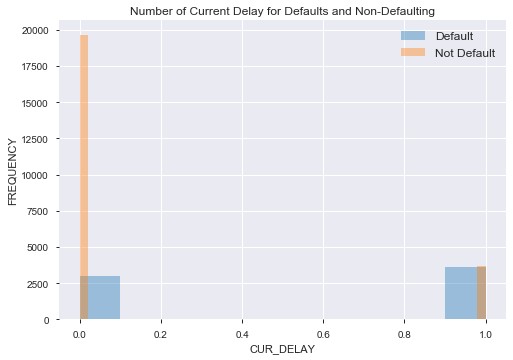

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df_CUR_DELAY_TARGET = pd.concat([df['default.payment.next.month'],df_CurDelay], axis=1)

df_default_one = df_CUR_DELAY_TARGET[df_CUR_DELAY_TARGET['default.payment.next.month']== 1]
sns.distplot(df_default_one['CUR_DELAY'], kde=False, label="Default")

df_default_zero = df_CUR_DELAY_TARGET[df_CUR_DELAY_TARGET['default.payment.next.month']== 0]
sns.distplot(df_default_zero['CUR_DELAY'], kde=False, label="Not Default")

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Number of Current Delay for Defaults and Non-Defaulting')
plt.xlabel('CUR_DELAY')
plt.ylabel('FREQUENCY')

If a client is in a current delay state, they are much likely to default next month.

# Stitch DataFrames together.

In [18]:
df_data = pd.concat([df_PP, df_AVG_BILL_CL, df_AVG_PAY_CL, df_NUM_DELAYS, df_education_one_hot, df_marriage_one_hot, df_sex_one_hot, df_limbal, df_age, df_BILL_CHANGE, df_PAY_CHANGE, df_CurDelay, df['default.payment.next.month']], axis=1)

# Change Feature Names
Feature names can't have brackets, or commas.

In [19]:
column_mapping = {}
for col in list(df_data.columns):

    new_col = col.replace(']', ')')
    new_col = new_col.replace('[', '(')
    new_col = new_col.replace(', ', '-')
    new_col = new_col.replace(' ', '')
    column_mapping[col] = new_col

df_data = df_data.rename(columns=column_mapping)

### Normalize Data

Normalizing data is necessary for some models that use mathematical relationships between variables.

Method of Normalizing:
* MinMaxScaler
    * x<sub>i</sub> = (x<sub>i</sub> - x<sub>min</sub>) / (x<sub>max</sub> - x<sub>min</sub>)

In [20]:
import pandas as pd
from sklearn import preprocessing

x = df_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_data = pd.DataFrame(x_scaled, columns=df_data.columns)

In [21]:
# Display all columns.
pd.set_option('display.max_columns', 999)
display(df_data.describe())

display(df_data.head())

,PP,AVG_BILL_CL,AVG_PAY_CL,NUM_DELAYS,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_Undergraduate,EDUCATION_Unknown,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2,LIMIT_BAL_(9999.999-80000.0),LIMIT_BAL_(80000.0-200000.0),LIMIT_BAL_(200000.0-1000000.0),AGE_(20-30),AGE_(30-40),AGE_(40-50),AGE_(50-60),AGE_(60-70),AGE_(70-Death),BILL_CHANGE_1,BILL_CHANGE_2,BILL_CHANGE_3,BILL_CHANGE_4,BILL_CHANGE_5,PAY_CHANGE_1,PAY_CHANGE_2,PAY_CHANGE_3,PAY_CHANGE_4,PAY_CHANGEbb_5,CUR_DELAY,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.340225,0.108210,0.016027,0.139033,0.352833,0.163900,0.004100,0.467667,0.011500,0.001800,0.455300,0.532133,0.010767,0.396267,0.603733,0.359967,0.319300,0.320733,0.320600,0.374600,0.215467,0.078033,0.010467,0.000833,0.385992,0.686346,0.165227,0.429346,0.291697,0.842474,0.139923,0.597940,0.395176,0.538435,0.244033,0.221200
std,0.379125,0.062872,0.021677,0.259050,0.477859,0.370191,0.063901,0.498962,0.106621,0.042389,0.498006,0.498975,0.103204,0.489129,0.489129,0.479998,0.466213,0.466766,0.466715,0.484028,0.411153,0.268229,0.101772,0.028856,0.034793,0.011038,0.014134,0.028126,0.020451,0.009861,0.009944,0.024443,0.024011,0.025100,0.429520,0.415062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042687,0.046917,0.004649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378993,0.684153,0.161822,0.422793,0.287918,0.842014,0.139310,0.596808,0.394008,0.537760,0.000000,0.000000
50%,0.101829,0.092448,0.010755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383026,0.685133,0.162664,0.424626,0.289604,0.842438,0.139538,0.597429,0.394966,0.538625,0.000000,0.000000
75%,0.694778,0.164470,0.018066,0.166667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.387892,0.686642,0.164850,0.428577,0.291775,0.843036,0.140399,0.599394,0.395827,0.539703,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,PP,AVG_BILL_CL,AVG_PAY_CL,NUM_DELAYS,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Others,EDUCATION_Undergraduate,EDUCATION_Unknown,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_1,SEX_2,LIMIT_BAL_(9999.999-80000.0),LIMIT_BAL_(80000.0-200000.0),LIMIT_BAL_(200000.0-1000000.0),AGE_(20-30),AGE_(30-40),AGE_(40-50),AGE_(50-60),AGE_(60-70),AGE_(70-Death),BILL_CHANGE_1,BILL_CHANGE_2,BILL_CHANGE_3,BILL_CHANGE_4,BILL_CHANGE_5,PAY_CHANGE_1,PAY_CHANGE_2,PAY_CHANGE_3,PAY_CHANGE_4,PAY_CHANGEbb_5,CUR_DELAY,default.payment.next.month
0,0.089434,0.053028,0.002365,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.392536,0.692864,0.165365,0.424626,0.289604,0.840171,0.141818,0.597429,0.394966,0.538625,1.0,1.0
1,0.292791,0.045795,0.002860,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.384897,0.684622,0.162279,0.424353,0.289837,0.841890,0.139502,0.597429,0.396580,0.535192,1.0,1.0
2,0.108388,0.075191,0.008404,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.422665,0.685466,0.161992,0.423400,0.288641,0.842451,0.139876,0.597429,0.394966,0.529470,0.0,0.0
3,0.036259,0.179332,0.011517,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.377196,0.683777,0.195555,0.422319,0.287908,0.842413,0.140603,0.597811,0.395086,0.538909,0.0,0.0
4,0.540054,0.106676,0.081076,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.396849,0.646471,0.186019,0.431042,0.289647,0.796800,0.175380,0.601252,0.427148,0.538666,0.0,0.0


In [22]:
#Generating Profile Report
profile = ProfileReport(df_data)

#Outputing Profile Report to html file in current directory
profile

# Modeling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

### Split into Train, Validation, Test

In [24]:
# Split data into train, validation, and testing set.

X = df_data.drop('default.payment.next.month', axis=1)
Y = df_data['default.payment.next.month']

seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)

In [25]:
type(X_train)

pandas.core.frame.DataFrame

## Sampling techniques
Our data-set is unbalanced, so we can try some different sampling techniques to combat this issue.

* Undersampling
* Oversampling
* SMOTE

Below we are generating different data sets with each of the above sampling methods.

In [26]:
X_train.head()
[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,34]

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 34]

In [27]:
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Random Undersampling
rus = RandomUnderSampler(random_state=77)
rus_x_train, rus_y_train = rus.fit_resample(X_train, y_train)

# Random Oversampling
ros = RandomOverSampler(random_state=77)
ros_x_train, ros_y_train = ros.fit_resample(X_train, y_train)

# SMOTE
## Note: We have categorical features.
sm = SMOTENC(random_state=77, categorical_features=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,34])
sm_x_train, sm_y_train = sm.fit_resample(X_train, y_train)

# Put all the different datasets into a single list so we can iterate over it.
train_sample_labels = ["Unbalanced", "Undersample", "Oversample", "SMOTE"]
train_samples = [(X_train, y_train), (rus_x_train, rus_y_train), (ros_x_train, ros_y_train), (sm_x_train, sm_y_train)]

## Test models
Attempted Models:
* XGBoost
* Random Forest
* Extra Trees
* Logisitic Regression
* Multilayer perceptron (Artificial Neural Network)

Each model is sent through a pipeline that builds 4 models (one for each sampling technique).

In [28]:
def test_models(model_choice, param_dict, model_name):
    ensemble = []

    n = 0
    for sample in train_samples: 
        # Train model.
        model = model_choice(**param_dict)
        model.fit(sample[0], sample[1])

        # Make predictions on validation data.
        preds = model.predict(X_validation)
        preds_prob = model.predict_proba(X_validation)[:,1]

        # Calculate metrics (auc, f1, accuracy, precision)
        fpr, tpr, thresholds = roc_curve(y_validation, preds_prob)
        roc_auc = auc(fpr, tpr)
        acc = accuracy_score(y_validation, preds)

        tn, fp, fn, tp = confusion_matrix(y_validation, preds).ravel()
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)

        f1 = (1 + 1) * (precision*recall)/(1*precision+recall)
        f2 = (1 + 2) * (precision*recall)/(2*precision+recall)
        f3 = (1 + 3) * (precision*recall)/(3*precision+recall)

        p, r, thresholds = precision_recall_curve(y_validation, preds_prob)
        f1_sc = [] 
        for i, threshold in enumerate(thresholds):
            f = 2*(p[i]*r[i])/(p[i]+r[i])

            f1_sc.append((f, threshold))

        # Find maximum f1. Set threshold to this.
        max_f = max(f1_sc, key=lambda item:item[0])

        ensemble.append([roc_auc, max_f, f1, f2, f3, precision, recall, acc, model_name, train_sample_labels[n], model])

        # Create plot.
        label='%s (AUC = %0.2f)' % (train_sample_labels[n], roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
        n += 1

    # Show plot.
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Show all sampling methods metrics.
    return ensemble

In [29]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Models Tested
* XGBoost
* Random Forest
* Extra Trees
* Logisitic Regression
* Multilayer perceptron (Artificial Neural Network)

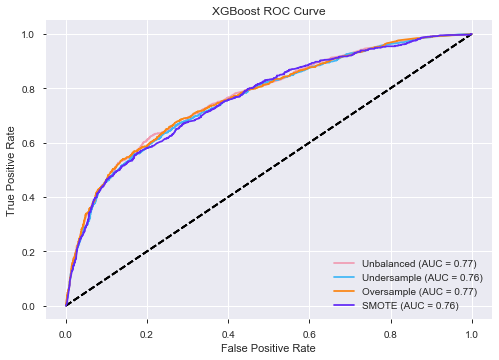

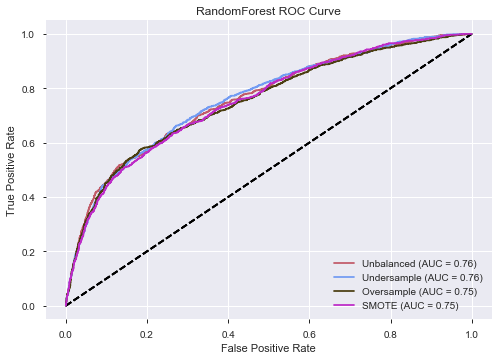

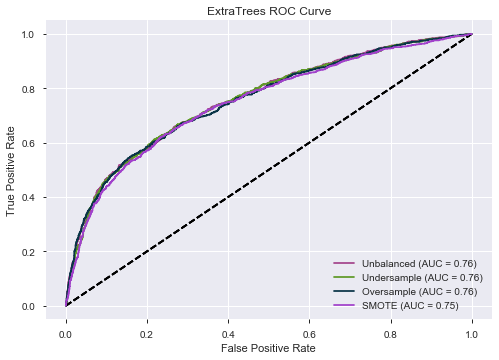

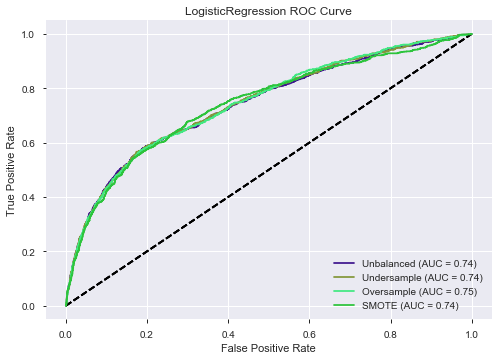

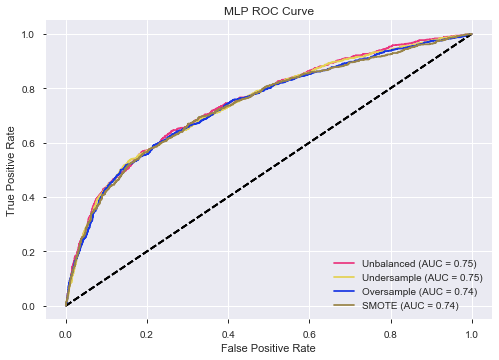

In [30]:
xgb_params =  {'objective':'binary:logistic',
                  'learning_rate':0.01,
                  'max_depth':6,
                  'min_child_weight':14,
                  'n_estimators':100,
                  'nthreads':1, 
                  'subsample':1.0}

rf_params = {'bootstrap':'True',
              'criterion':'gini',
              'max_features':.9,
              'min_samples_leaf':10,
              'min_samples_split':11,
              'n_estimators':100
            }

xt_params = {'bootstrap':'False',
             'criterion':'entropy',
             'max_features':0.45,
             'min_samples_leaf':9,
             'min_samples_split':5,
             'n_estimators':100
            }

lr_params = {}

mlp_params = {}

models_to_test = [(xgb.XGBClassifier, xgb_params, "XGBoost"), 
                  (RandomForestClassifier, rf_params, "RandomForest"),
                 (ExtraTreesClassifier, xt_params, "ExtraTrees"),
                 (LogisticRegression, lr_params, "LogisticRegression"),
                 (MLPClassifier, mlp_params, "MLP")]

total_ensemble = []
for m in models_to_test:
    total_ensemble.append(test_models(m[0], m[1], m[2]))

## Evaluation Metrics:

In evaluating metrics, the decision was made to assert the most importance to the f1 score.  As we were unable to determine whether or not to weigh false negatives with more importance, we opted to treat precision and recall equally; this is best accomplished through the maximization of f1-score.

General Form of F-Score:

`f_beta = (1 + beta^2) * (recall * precision) / (beta^2 * precision + recall)`

Thus f1 score (beta = 1):

`f_1 = 2 * ((precision * recall) / (precision + recall))`

Where:

`precision = TP / (TP + FP)`

`recall = TP / (TP + FN)`

If we were to choose a beta value ">1" then we would be asserting larger importance to maximizing recall and thus also minimizing false negatives.  A beta value of  '<1' (but '>0') would have an inverse effect: maximization of precision would be more important and thus minimization of false positives.

#### In Business Terms:
**False Positives** = Model Predicts that a given customer will default and they do not.

**False Negative** = Model Predicts that a given customer will not default and they do.

Without further information on the risk/costs that the lender will incur for a default payment, we could not justify a weighting of importance to either.

In [31]:
# Collapse list.
te = [item for sublist in total_ensemble for item in sublist]

# Sort on f1 score.
te.sort(key=lambda x: x[2], reverse=True)

for classifier in te:
    print("\nModel: {}\n\tSampling Method: {}\n\tAUC: {}\n\tMax f1 & thresh: {}\n\tf1: {}\n\tf2: {}\n\tf3: {}\n\tPrecision: {}\n\tRecall: {}\n\tAccuracy: {}".format(classifier[8], classifier[9], classifier[0], classifier[1], classifier[2],classifier[3],classifier[4],classifier[5],classifier[6],classifier[7],classifier[8]))


Model: XGBoost
	Sampling Method: Oversample
	AUC: 0.767345322328022
	Max f1 & thresh: (0.526530612244898, 0.5475108)
	f1: 0.5135011441647598
	f2: 0.5339467005076143
	f3: 0.5447924253459577
	Precision: 0.4605911330049261
	Recall: 0.5801447776628749
	Accuracy: 0.7637777777777778

Model: LogisticRegression
	Sampling Method: Undersample
	AUC: 0.7449560371981006
	Max f1 & thresh: (0.5143394452280207, 0.5146204010217579)
	f1: 0.5109353187529084
	f2: 0.5285622593068037
	f3: 0.5378398236590742
	Precision: 0.46446700507614214
	Recall: 0.5677352637021716
	Accuracy: 0.7664444444444445

Model: RandomForest
	Sampling Method: Oversample
	AUC: 0.7501878433244712
	Max f1 & thresh: (0.5139442231075697, 0.488988846319182)
	f1: 0.5106167846309405
	f2: 0.5144312393887946
	f3: 0.5163599182004092
	Precision: 0.49950544015825915
	Recall: 0.5222337125129266
	Accuracy: 0.7848888888888889

Model: ExtraTrees
	Sampling Method: Oversample
	AUC: 0.7562055619186334
	Max f1 & thresh: (0.516953316953317, 0.5371331377

## Build Model that Maximizes f1 score. 

Run with the best threshold value too.

Running: XGBoost with Oversample



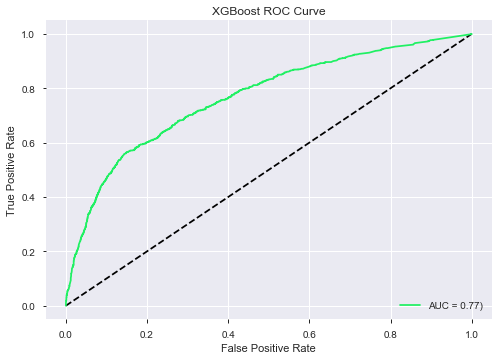

Confusion Matrix:
-----------
565 | 449
-----------
501 | 2985
-----------

AUC: 0.7659768405829575
f1: 0.5432692307692307
f2: 0.5478345184227537
f3: 0.5501460564751703
Accuracy: 0.7888888888888889
Precision: 0.5300187617260788
Recall: 0.5571992110453649


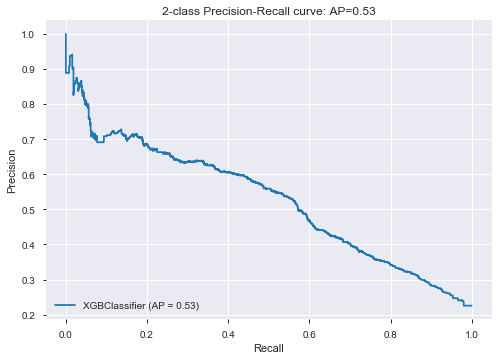

In [32]:
# Grab threshold value that maximizes the f1 score when oversampling.
threshold = te[0][1][1]
model_name = te[0][8]
sampling_technique = te[0][9]

# Grab best model object.
best_model = te[0][10]

print("Running: {} with {}\n".format(model_name, sampling_technique))

# Make predictions on Testing data.
preds_prob = best_model.predict_proba(X_test)[:,1]

# Create prediction using threshold that maximizes f1 score.
preds = (preds_prob >= threshold).astype(bool)

# Calculate metrics (auc, f1, accuracy, precision)
fpr, tpr, thresholds = roc_curve(y_test, preds_prob)
roc_auc = auc(fpr, tpr)
acc = accuracy_score(y_test, preds)

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)

f1 = (1 + 1) * (precision*recall)/(1*precision+recall)
f2 = (1 + 2) * (precision*recall)/(2*precision+recall)
f3 = (1 + 3) * (precision*recall)/(3*precision+recall)

# Create plot for AUC
label='AUC = %0.2f)' % (roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))

# Show plot.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{model_name} ROC Curve')
plt.legend(loc="lower right")
plt.show()

average_precision = average_precision_score(y_test, preds_prob)    
disp = plot_precision_recall_curve(best_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
               'AP={0:0.2f}'.format(average_precision))

# Print Confusion Matrix.
tn, fp, fn, tp = confusion_matrix(y_test, preds, labels=[0,1]).ravel()
print("Confusion Matrix:")
print("-----------")
print(tp,"|",fn)
print("-----------")
print(fp,"|",tn)
print("-----------\n")

print("AUC: {}\nf1: {}\nf2: {}\nf3: {}\nAccuracy: {}\nPrecision: {}\nRecall: {}".format(roc_auc, f1, f2, f3, acc, precision, recall))

# Feature Importance:

### SHAP (SHapley Additive exPlanations)
SHAP measures the impact of variables taking into account the interaction with other variables. 

Reference: 
* https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

* https://blog.datascienceheroes.com/how-to-interpret-shap-values-in-r/Which features are more important to XGBoost?

In [33]:
import shap
print(shap.__version__)

# May need to run the following as system admin in anaconda command prompt
## conda install -c conda-forge shap

0.34.0


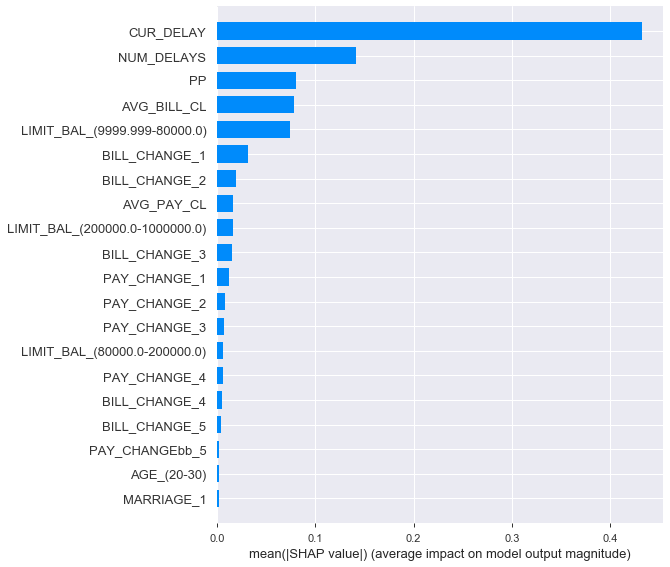

In [34]:
if sampling_technique == "Unbalanced":
    features = train_samples[0][0]
elif sampling_technique == "Undersample":
    features = train_samples[1][0]
elif sampling_technique == "Undersample":
    features = train_samples[1][0]
else:
    features = train_samples[2][0]

shap_values = shap.TreeExplainer(best_model).shap_values(features)
shap.summary_plot(shap_values, features, plot_type="bar")

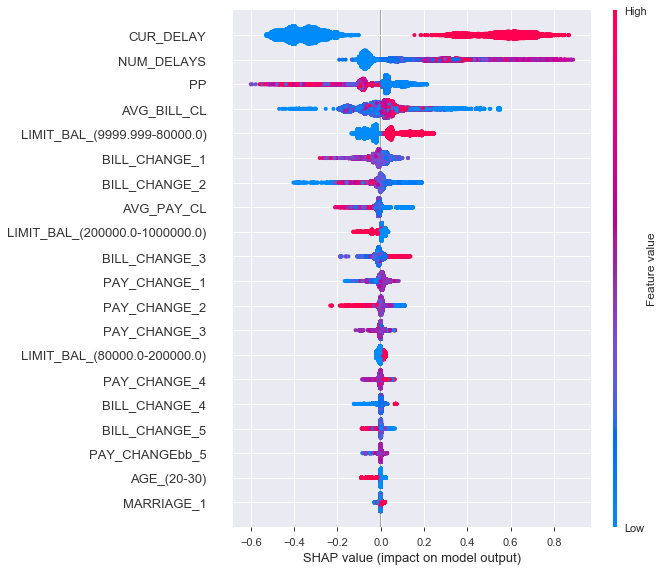

In [35]:
shap.summary_plot(shap_values, features) # Change to Red and Green

## How to read the graph above
Every observations training data is plotted above. 

**Feature importance:** Variables are ranked in descending order.

**Impact:** The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

**Original value:** Color shows whether that variable is high (in red) or low (in blue) for that observation.

# Conclusions

## Model Choice:
* XGBoost
* Oversampling
* AUC: 0.77
* F1: 0.54
* Accuracy: 0.79


## Maching Learning Techniques:
* Pandas Profiling 
* Feature Engineering
* TPOT
* Sci-kit learn
* Combating Imbalanced data
* Evaluation methods matter

## Characterstics of Clients who Default (from SHAP)

* They're in a current delay
* They have a lot of previous delays.
* They don't pay their bills in the past.
* They spend more of their credit limit
* They have a credit limit between 9,999-80,000